# Ensembles

The data has been collected from 2018 FIFA World Cup Russia Official App.

https://www.kaggle.com/mathan/fifa-2018-match-statistics

We'll use the data that's pre-processed in the previous workshop (day 9), so that we don't repeat steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ensembles
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

%matplotlib inline

## Load pre-processed data

Load pre-processed data from Day 9 workshop.

In [2]:
df_train = pd.read_csv('fifa_processed_train.csv')
df_test = pd.read_csv('fifa_processed_test.csv')

In [3]:
print(df_train.shape, df_test.shape)

(90, 6) (30, 6)


In [4]:
df_train

,Goal Scored,On-Target,Off-Target,Corners,1st Goal,Man of the Match
0,1.476178,1.825788,2.035973,2.129917,1.441201,1
1,-0.269057,-1.285088,0.333417,-1.095194,-0.260364,1
2,-0.269057,-0.840677,-0.092222,0.920500,1.079166,1
3,1.476178,0.048145,-1.794778,-0.288916,0.427503,0
4,-1.141675,-0.396266,-0.943500,0.114223,-1.093044,0
5,0.603561,1.381377,-0.092222,0.114223,-0.658602,1
6,0.603561,0.492555,0.333417,-1.095194,-0.405178,0
7,0.603561,-0.396266,-1.794778,-0.692055,-0.405178,1
8,-0.269057,0.048145,0.333417,0.114223,0.174078,1
9,-1.141675,-0.396266,-0.943500,0.114223,-1.093044,0


In [5]:
RandomForestClassifier?

## Random Forest

In [6]:
# n_estimators should be a factor of the number of samples
# here we only have 90 training samples
# n_jobs trains 2 in parallel (optional)

# after visual inspection of a few trees
# the trees are too specific and deep (1-3 samples at the leaf nodes)
#
# In practice, you can try plotting max_depth vs. accuracy in 
# a learning curve (more rigorous approach)
rf = RandomForestClassifier(n_estimators=5, n_jobs=2, max_depth=5)

# cross_validate is redundant because bagging is
# applying a similar concept, just not repeating samples
# more importantly, our dataset is too small, so
# at cv=3, we have 6 validation & 12 training

# 90 train / 5 trees = 18 per tree
# at cv=3, we have 18/3 = 6 val, 12 train

target = 'Man of the Match'
Z_train = df_train.loc[:, df_train.columns != target]
y_train = df_train[target]

rf.fit(Z_train, y_train) # typically we have used cross_validate

# show the trees
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=104294493, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=959006163, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fracti

In [7]:
# returns accuracy
Z_test = df_test.loc[:, df_test.columns != target]
y_test = df_test[target]
rf.score(Z_test, y_test)

0.7

In [8]:
y_pred = rf.predict(Z_test)
print(classification_report(y_test, y_pred)) # any improvement???

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        18
           1       0.60      0.75      0.67        12

   micro avg       0.70      0.70      0.70        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.72      0.70      0.70        30



In [9]:
# inspect the first tree
rf.estimators_[0].feature_importances_ 

array([0.32359481, 0.14347275, 0.16019584, 0.21134958, 0.16138702])

In [10]:
rf.estimators_[1].feature_importances_ 

array([0.48809661, 0.10146116, 0.23688948, 0.08245596, 0.09109679])

In [11]:
Z_train.columns

Index(['Goal Scored', 'On-Target', 'Off-Target', 'Corners', '1st Goal'], dtype='object')

In [12]:
def plot_tree(tree, columns, filename):
    from sklearn.tree import export_graphviz
    import graphviz

    export_graphviz(tree,
                    out_file=filename,
                    feature_names=columns,
                    filled=True,
                    rounded=True)
    source = graphviz.Source.from_file(filename)
    source.render(view=True)

plot_tree(rf.estimators_[0], Z_train.columns, 'fifa_tree1_depth5.dot')

In [13]:
plot_tree(rf.estimators_[1], Z_train.columns, 'fifa_tree2_depth5.dot')

In [14]:
df_train.columns

Index(['Goal Scored', 'On-Target', 'Off-Target', 'Corners', '1st Goal',
       'Man of the Match'],
      dtype='object')

## Ada Boost

In [15]:
# limit max_depth to avoid poor performance in boosting
# due to overfitting in the first generation tree
#
# max_depth determined by visual inspection of first gen tree
# can tune max_depth by plotting accuracy vs. depth
model = DecisionTreeClassifier(max_depth=7)

ada = AdaBoostClassifier(model, n_estimators=50)
ada.fit(Z_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [16]:
# how many models were generated
len(ada.estimators_)

50

[Text(0, 0.5, 'estimator error'), Text(0.5, 0, 'n_estimators')]

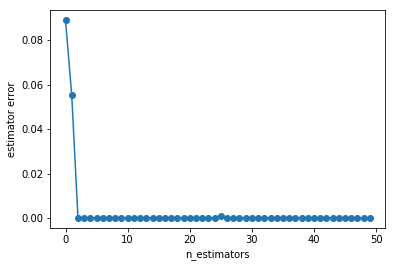

In [17]:
# errors for each successive generation (lower = better)
# looks like n_estimators=3 is good enough
fig, ax = plt.subplots()
ax.plot(ada.estimator_errors_, marker='o')
ax.set(xlabel='n_estimators', ylabel='estimator error')

# but, what is this error on? Training set?

In [18]:
# weights for each successive generation (higher = better)
ada.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
plot_tree(ada.estimators_[0], Z_train.columns, 'fifa_boost_tree1.dot')

In [21]:
plot_tree(ada.estimators_[1], Z_train.columns, 'fifa_boost_tree2.dot')

In [22]:
ada.feature_importances_

array([0.06435882, 0.26295221, 0.23144911, 0.16360988, 0.27762999])

In [23]:
# evaluate on test set
y_pred_ada = ada.predict(Z_test)
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.77      0.56      0.65        18
           1       0.53      0.75      0.62        12

   micro avg       0.63      0.63      0.63        30
   macro avg       0.65      0.65      0.63        30
weighted avg       0.67      0.63      0.64        30

